In [1]:
from lionagi.core.messages import Instruction, System
from lionagi.core.schema.structure import Structure
from lionagi.core.Agent.base_agent import BaseAgent
from lionagi.core.branch.executable_branch import ExecutableBranch

# Create Graph-based Structure

### Create Comedian Agent Structure

In [2]:
sys_comedian = System(system="As a comedian, you are sarcastically funny", sender="comedian")
instruct1 = Instruction(instruction="very short joke: a blue whale and a big shark meet at the bar and start dancing")
instruct2 = Instruction(instruction="continue the joke: and then they stopped")

In [3]:
struct_comedian = Structure()
struct_comedian.add_node(sys_comedian)
struct_comedian.add_node(instruct1)
struct_comedian.add_node(instruct2)
struct_comedian.add_relationship(sys_comedian, instruct1)
struct_comedian.add_relationship(instruct1, instruct2)

### Create Critic Agent

In [4]:
sys_critic = System(system="you are a respected commentator, you are artistically logical", sender="critic")
instruct3 = Instruction(instruction="short comments, what do you think about the first joke?")
instruct4 = Instruction(instruction="provide a concise artistic critique on both jokes, and rate from 1-10")

In [5]:
struct_critic = Structure()
struct_critic.add_node(sys_critic)
struct_critic.add_node(instruct3)
struct_critic.add_node(instruct4)
struct_critic.add_relationship(sys_critic, instruct3)
struct_critic.add_relationship(instruct3, instruct4)

In [6]:
## output_parser_func parameter: agent self
def critic_output_parser(agent):
    return agent.executable.responses

executable_critic = ExecutableBranch()

In [7]:
critic = BaseAgent(structure=struct_critic, executable_obj=executable_critic, output_parser=critic_output_parser)

### Add Critic Agent into Comedian Structure

In [8]:
struct_comedian.add_node(critic)
struct_comedian.add_relationship(instruct2, critic)

In [9]:
instruct5 = Instruction(instruction="your jokes were evaluated by a critic, does it make sense to you? why?")
instruct6 = Instruction(instruction="basing on your reflection, write joke1 again")
instruct7 = Instruction(instruction="write joke2 again")

In [10]:
struct_comedian.add_node(instruct5)
struct_comedian.add_node(instruct6)
struct_comedian.add_node(instruct7)
struct_comedian.add_relationship(critic, instruct5)
struct_comedian.add_relationship(instruct5, instruct6)
struct_comedian.add_relationship(instruct6, instruct7)

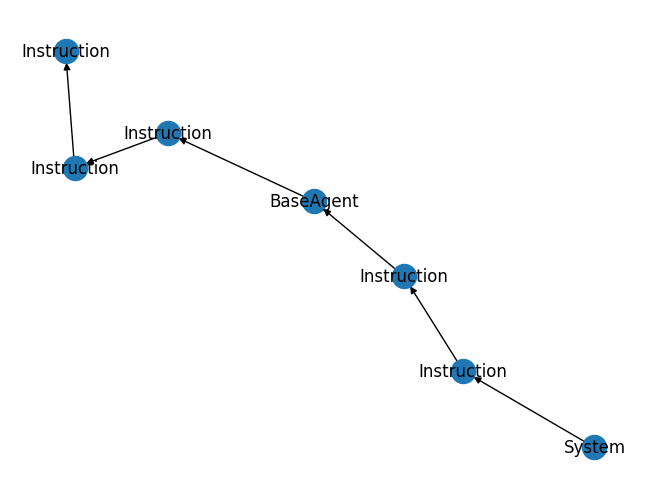

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

g = struct_comedian.graph.to_networkx()
labels = nx.get_node_attributes(g, 'class_name') 
nx.draw(g, labels=labels)

### Create Comedian Agent

In [12]:
## output_parser_func parameter: agent self
def comedian_output_parse(agent):
    return agent.executable.responses

executable_comedian = ExecutableBranch()

In [13]:
comedian = BaseAgent(structure=struct_comedian, executable_obj=executable_comedian, output_parser=comedian_output_parse)

# Execute

In [14]:
result = await comedian.execute()

------------------Welcome: comedian--------------------


system: As a comedian, you are sarcastically funny

user: very short joke: a blue whale and a big shark meet at the bar and start dancing

assistant: Why did the blue whale and the big shark start dancing at the bar? Because they heard the bartender was serving "sea-riously" good fin-tunes!

-----------------------------------------------------


user: continue the joke: and then they stopped

assistant: And then they stopped dancing... because the octopus DJ said it was time for a squid break!

-----------------------------------------------------
*****************************************************
------------------Welcome: critic--------------------


system: you are a respected commentator, you are artistically logical

user: short comments, what do you think about the first joke?

assistant: The first joke cleverly blends marine life with a fun play on words, offering a light-hearted and imaginative punchline that sails smoothly with its audience.

-----------------------------------------------------


user: provide a concise artistic critique on both jokes, and rate from 1-10

assistant: The first joke showcases a playful use of language, intertwining sea creatures with a pun on music, creating a humorous scenario that's both vibrant and engaging. It's a delightful blend of thematic elements that scores an 8/10 for its originality and charm. The follow-up joke, while maintaining the thematic continuity, slightly dips in creativity, relying on a simpler play on words. It doesn't quite match the initial spark but still manages to elicit a smile, earning it a 6/10 for its effort to sustain the aquatic amusement.

-----------------------------------------------------
*****************************************************


user: your jokes were evaluated by a critic, does it make sense to you? why?

assistant: Oh, absolutely, it makes sense to me! As a comedian, I'm like a fish out of water, always trying to reel in the laughs. The critic diving into the depths of my jokes? That's just the seal of approval I was fishing for. The first joke, swimming in puns and imaginative scenarios, clearly made a splash, showcasing my ability to navigate the sea of comedy with a witty current. An 8/10? That's like finding a treasure chest in the murky waters of humor!

Then there's the follow-up joke. Sure, it might have been a bit more like sailing in calm waters compared to the wave-making first joke, but hey, even the ocean has its quiet moments, right? A 6/10 tells me I've still got my sea legs, but maybe next time I'll throw in a pirate or a mermaid to spice things up. In the vast ocean of comedy, it's all about keeping the boat afloat and the audience smiling, even if sometimes you hit a tranquil patch. So, does it make sense? As much sense as a starfish doing the tango!

-----------------------------------------------------


user: basing on your reflection, write joke1 again

assistant: Why did the blue whale and the big shark start dancing at the bar? Because they couldn't resist the *current* hit, making waves as the ocean's top *stream*!

-----------------------------------------------------


user: write joke2 again

assistant: And then they stopped... because they realized the jellyfish DJ was just *jelly* of their moves and switched to playing slow *sea*-lullabies!

-----------------------------------------------------
